[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/MGP/blob/main/modelagem_7.ipynb)

# Modelagem e Gestão de Processos


**Prof. Diogo Ferreira de Lima Silva (TEP-UFF)**


Código produzido a partir de: https://medium.com/mlearning-ai/a-stochastic-model-for-demand-forecating-in-python-a1b568b80b94

# Previsão de Demanda - Médias Móveis

Nessa aula, vamos fazer algumas análises para previsão de demanda no Python. Para isso, utilizaremos alguns conjuntos de dados disponíveis no Kaggle.
 

### Importando Bibliotecas

Importaremos as seguintes bibliotecas:

- pandas: biblioteca muito utilizada para análise de dados em formato tabular (assim como um Excel).
- matplotlib.pyplot: pacote vastamente utilizado para visualizações.


In [319]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

### Importação e limpeza dos dados

Inicialmente, vamos importar os dados.

In [434]:
# Como os nossos dados possuem uma coluna de datas, avisaremos isso ao python. 

url = 'https://raw.githubusercontent.com/diogoflim/MGP/main/dados/dados_passageiros.csv'


dados_brutos = pd.read_csv(url, index_col=0, parse_dates=["Month"])
dados_brutos

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Nossos dados parecem estar organizados. Vou apenas renomear as colunas. 

Antes disso, criarei uma cópia para deixarmos guardados os dados brutos 

In [321]:
dados_modificados = dados_brutos.rename(columns={"#Passengers": "Passageiros"}).rename_axis("Mês") # Muda o nome das colunas
dados = dados_modificados.copy()

### Visualização inicial

Inicialmente, podemos perceber que nossos temos 144 observações de demandas mensais de passageiros, entre 1949 e 1960.

Uma visualização básica pode nos ajudar a entender o funcionamento da demanda.

Vamos usar um simples gráfico de linha.

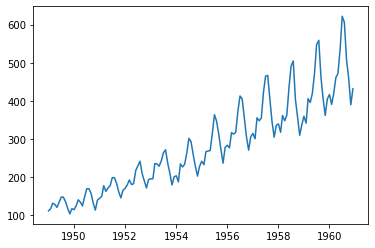

In [322]:
plt.plot(dados)
plt.show()

A demanda cresceu ao longo dos anos. Porém, um comportamento cíclico parece ter sido detectado.

O que poderia ser?

- **Talvez alguns meses (exemplo: férias) impactem a demanda por passageiros.**  

In [323]:
dados.groupby(by=[dados.index.month]).mean()

,Passageiros
Mês,
1,241.750000
2,235.000000
3,270.166667
4,267.083333
5,271.833333
6,311.666667
7,351.333333
8,351.083333
9,302.416667


<AxesSubplot:xlabel='Mês'>

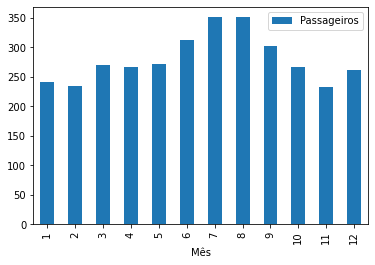

In [324]:
dados.groupby(by=[dados.index.month]).mean().plot.bar()

A análise indica uma maior média nos meses de **verão no hemisfério norte!**

Vamos seguir para os modelos de séries temporais.

### Média móvel simples (SMA)


Vamos aplicar uma média móvel simples com tempo igual a 3

In [325]:
k=3
dados.rolling(k).mean()

,Passageiros
Mês,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,120.666667
1949-04-01,126.333333
1949-05-01,127.333333
...,...
1960-08-01,587.666667
1960-09-01,578.666667
1960-10-01,525.000000


In [326]:
# Criaremos uma nova coluna que receberá essa análise!
dados["MM_3"]= dados["Passageiros"].rolling(k).mean()
dados

,Passageiros,MM_3
Mês,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,120.666667
1949-04-01,129,126.333333
1949-05-01,121,127.333333
...,...,...
1960-08-01,606,587.666667
1960-09-01,508,578.666667
1960-10-01,461,525.000000


Seguindo esse raciocínio, poderíamos fazer várias ao mesmo tempo

In [327]:
dados_sma = dados_modificados.copy()

for k in [3, 6, 9, 12]: 
    dados_sma ["MM_" + str(k)] = dados_sma["Passageiros"].rolling(k).mean()

dados_sma

,Passageiros,MM_3,MM_6,MM_9,MM_12
Mês,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN,NaN
1949-03-01,132,120.666667,NaN,NaN,NaN
1949-04-01,129,126.333333,NaN,NaN,NaN
1949-05-01,121,127.333333,NaN,NaN,NaN
...,...,...,...,...,...
1960-08-01,606,587.666667,519.166667,480.888889,463.333333
1960-09-01,508,578.666667,534.000000,492.333333,467.083333
1960-10-01,461,525.000000,534.000000,497.222222,471.583333


<AxesSubplot:xlabel='Mês'>

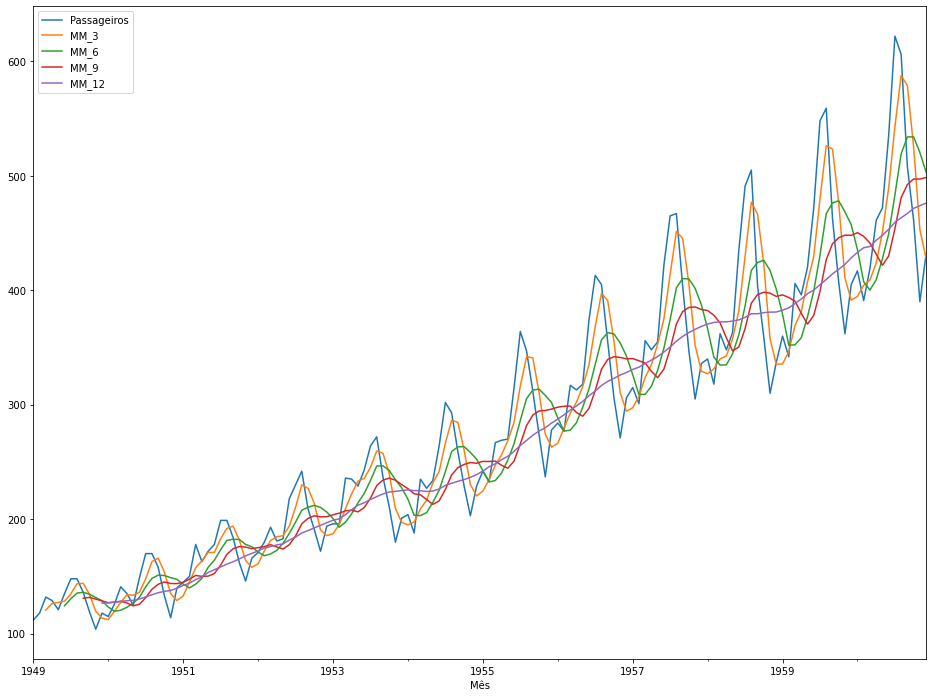

In [328]:
dados_sma.plot(figsize=(16,12))

Perceba que valores mais altos de $k$ de alguma maneira suavizam a média! Estamos perdendo o efeito sazonal.

Vamos analisar o modelo de suavização exponencial.


### Média Móvel Exponencialmente Ponderada (EWMA)

In [416]:
dados_ewma = dados_modificados.copy()

In [417]:
dados_ewma["alfa=0,5"] = dados_ewma["Passageiros"].ewm(alpha=0.5, adjust=False).mean()
dados_ewma

,Passageiros,"alfa=0,5"
Mês,,
1949-01-01,112,112.000000
1949-02-01,118,115.000000
1949-03-01,132,123.500000
1949-04-01,129,126.250000
1949-05-01,121,123.625000
...,...,...
1960-08-01,606,582.096411
1960-09-01,508,545.048205
1960-10-01,461,503.024103


### Considerando a Sazonalidade

Para considerar a sazonalidade, usaremos o procedimento visto na aula:

O efeito sazonal é dado por: $$\frac{\text{𝑚é𝑑𝑖𝑎 𝑑𝑜 𝑚ê𝑠}}{\text{𝑚é𝑑𝑖𝑎 𝑡𝑜𝑡𝑎𝑙}}$$

Uma vez calculado, faremos os passos:

1. Use a fórmula a seguir para ajustar os dados com o efeito sazonal: $ 𝑉𝑎𝑙𝑜𝑟 𝑎𝑗𝑢𝑠𝑡𝑎𝑑𝑜 = \frac{\text{𝑉𝑎𝑙𝑜𝑟 𝑜𝑏𝑠𝑒𝑟𝑣𝑎𝑑𝑜}}{\text{𝐸𝑓𝑒𝑖𝑡𝑜 𝑆𝑎𝑧𝑜𝑛𝑎𝑙}}$

2. Escolha um método de previsão

3. Aplique o método de previsão aos dados ajustados (que consideram o efeito sazonal)

4. Multiplique essa previsão pelo efeito sazonal correspondente para obter o valor de previsão real (sem o ajuste sazonal)


In [418]:
dados_ajustados = dados_modificados.copy()
dados_ajustados

,Passageiros
Mês,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Inicialmente, precisamos calcular o efeito sazonal. Para isso, usamos a média mensal e a média total.

In [419]:
# Média total
dados_ajustados.mean()

Passageiros    280.298611
dtype: float64

In [420]:
# Média por mês

dados_ajustados.groupby(by=[dados_ajustados.index.month]).mean()

,Passageiros
Mês,
1,241.750000
2,235.000000
3,270.166667
4,267.083333
5,271.833333
6,311.666667
7,351.333333
8,351.083333
9,302.416667


In [421]:
efeito_sazonal = dados_ajustados.groupby(by=[dados_ajustados.index.month]).mean() / dados_ajustados.mean()
efeito_sazonal

,Passageiros
Mês,
1,0.862473
2,0.838392
3,0.963853
4,0.952853
5,0.969799
6,1.111909
7,1.253425
8,1.252533
9,1.078909


De posse dessa informação, vamos para o passo 1 do procedimento. Devemos dividir cada valor pelo seu efeito sazonal correspondente.

In [422]:
efeito_sazonal.loc[10]

Passageiros    0.951069
Name: 10, dtype: float64

In [423]:
dados_ajustados["x_t ajustado"] = dados_ajustados["Passageiros"]

for i in range (len(dados_ajustados)):
    mes = dados_ajustados.iloc[i].name.month
    dados_ajustados["x_t ajustado"].iloc[i] = dados_ajustados["x_t ajustado"].iloc[i] / efeito_sazonal.loc[mes] 



c:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [424]:
dados_ajustados

,Passageiros,x_t ajustado
Mês,,
1949-01-01,112,129.859129
1949-02-01,118,140.745686
1949-03-01,132,136.950339
1949-04-01,129,135.382917
1949-05-01,121,124.768113
...,...,...
1960-08-01,606,483.819487
1960-09-01,508,470.846055
1960-10-01,461,484.717698


Agora, podemos aplicar uma previsão usando o x_t ajustado.

Vamos utilizar a suavização exponencial.

In [425]:
dados_ajustados["ewma_ajustado"]= dados_ajustados["x_t ajustado"].ewm(alpha=0.5, adjust=False).mean()

for k in [3, 6, 9, 12]: 
    dados_ajustados ["MM_" + str(k) + "_ajustado"] = dados_ajustados["Passageiros"].rolling(k).mean()

dados_ajustados

,Passageiros,x_t ajustado,ewma_ajustado,MM_3_ajustado,MM_6_ajustado,MM_9_ajustado,MM_12_ajustado
Mês,,,,,,,
1949-01-01,112,129.859129,129.859129,NaN,NaN,NaN,NaN
1949-02-01,118,140.745686,135.302407,NaN,NaN,NaN,NaN
1949-03-01,132,136.950339,136.126373,120.666667,NaN,NaN,NaN
1949-04-01,129,135.382917,135.754645,126.333333,NaN,NaN,NaN
1949-05-01,121,124.768113,130.261379,127.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1960-08-01,606,483.819487,485.669529,587.666667,519.166667,480.888889,463.333333
1960-09-01,508,470.846055,478.257792,578.666667,534.000000,492.333333,467.083333
1960-10-01,461,484.717698,481.487745,525.000000,534.000000,497.222222,471.583333


In [426]:
dados_ajustados["ewma"] = dados_ajustados["ewma_ajustado"]
for k in [3, 6, 9, 12]:  dados_ajustados ["MM_" + str(k)] = dados_ajustados ["MM_" + str(k) + "_ajustado"]


for i in range (len(dados_ajustados)):
    mes = dados_ajustados.iloc[i].name.month
    dados_ajustados["ewma"].iloc[i] = dados_ajustados["ewma"].iloc[i] * efeito_sazonal.loc[mes]
    for k in [3, 6, 9, 12]:
        dados_ajustados ["MM_" + str(k)].iloc[i] = dados_ajustados ["MM_" + str(k)].iloc[i] * efeito_sazonal.loc[mes]

c:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [427]:
dados_ajustados

,Passageiros,x_t ajustado,ewma_ajustado,MM_3_ajustado,MM_6_ajustado,MM_9_ajustado,MM_12_ajustado,ewma,MM_3,MM_6,MM_9,MM_12
Mês,,,,,,,,,,,,
1949-01-01,112,129.859129,129.859129,NaN,NaN,NaN,NaN,112.000000,NaN,NaN,NaN,NaN
1949-02-01,118,140.745686,135.302407,NaN,NaN,NaN,NaN,113.436401,NaN,NaN,NaN,NaN
1949-03-01,132,136.950339,136.126373,120.666667,NaN,NaN,NaN,131.205818,116.304933,NaN,NaN,NaN
1949-04-01,129,135.382917,135.754645,126.333333,NaN,NaN,NaN,129.354202,120.377078,NaN,NaN,NaN
1949-05-01,121,124.768113,130.261379,127.333333,NaN,NaN,NaN,126.327365,123.487749,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,483.819487,485.669529,587.666667,519.166667,480.888889,463.333333,608.317238,736.072046,650.273518,602.329328,580.340411
1960-09-01,508,470.846055,478.257792,578.666667,534.000000,492.333333,467.083333,515.996589,624.328618,576.137354,531.182816,503.940366
1960-10-01,461,484.717698,481.487745,525.000000,534.000000,497.222222,471.583333,457.928091,499.311250,507.870872,472.892666,448.508312


In [380]:
from sklearn.metrics import mean_squared_error

In [433]:
print("Erro Médio Quadrático sem considerar a sazonalidade:")
print(f'Suavização Exponencial com alfa = 0,5: {mean_squared_error(dados_ewma["Passageiros"].iloc[-30:], dados_ewma["alfa=0,5"].iloc[-30:])}')
print(f'Média móvel com k = 3: {mean_squared_error(dados_sma["Passageiros"].iloc[-30:], dados_sma["MM_3"].iloc[-30:])}')
print(f'Média móvel com k = 6: {mean_squared_error(dados_sma["Passageiros"].iloc[-30:], dados_sma["MM_6"].iloc[-30:])}')
print(f'Média móvel com k = 9: {mean_squared_error(dados_sma["Passageiros"].iloc[-30:], dados_sma["MM_9"].iloc[-30:])}')
print(f'Média móvel com k = 12: {mean_squared_error(dados_sma["Passageiros"].iloc[-30:], dados_sma["MM_12"].iloc[-30:])}')




print("-------------------------------------------")

print("Erro Médio Quadrático considerando a sazonalidade:")
print(f'Suavização Exponencial com alfa = 0,5: {mean_squared_error(dados_ajustados["Passageiros"].iloc[-30:], dados_ajustados["ewma"].iloc[-30:])}')
print(f'Média móvel com k = 3: {mean_squared_error(dados_ajustados["Passageiros"].iloc[-30:], dados_ajustados["MM_3"].iloc[-30:])}')
print(f'Média móvel com k = 6: {mean_squared_error(dados_ajustados["Passageiros"].iloc[-30:], dados_ajustados["MM_6"].iloc[-30:])}')
print(f'Média móvel com k = 9: {mean_squared_error(dados_ajustados["Passageiros"].iloc[-30:], dados_ajustados["MM_9"].iloc[-30:])}')
print(f'Média móvel com k = 12: {mean_squared_error(dados_ajustados["Passageiros"].iloc[-30:], dados_ajustados["MM_12"].iloc[-30:])}')


Erro Médio Quadrático sem considerar a sazonalidade:
Suavização Exponencial com alfa = 0,5: 1117.7321124867788
Média móvel com k = 3: 2000.3888888888894
Média móvel com k = 6: 5350.933333333334
Média móvel com k = 9: 6298.84938271605
Média móvel com k = 12: 5424.241435185186
-------------------------------------------
Erro Médio Quadrático considerando a sazonalidade:
Suavização Exponencial com alfa = 0,5: 84.18770649715597
Média móvel com k = 3: 3762.814759987126
Média móvel com k = 6: 1885.85392880878
Média móvel com k = 9: 1072.8940884847887
Média móvel com k = 12: 671.3310392106756
